# 2) IACOV - Model Development for Prognosis - DEATH
## Strategy 7) Training on 70% of a specific hospital plus same absolute number of same region hospitals

In [1]:
# !pip install npm nodejs

In [1]:
# !jupyter lab clean
# !jupyter lab build

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

In [3]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_en.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(8494, 65)

In [4]:
df_iacov_model.columns

Index(['city_hospital', 'cd_patient', 'hospital_time', 'age', 'race', 'braden',
       'heart_rate', 'resp_rate', 'sys_press', 'dias_press', 'mean_press',
       'temp', 'saturation', 'weight', 'height', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'neutr_lymph_ratio', 'lymph_crp_ratio',
       'basophils', 'eosinophils', 'monocytes', 'crp', 'albumin', 'ldh', 'alt',
       'ast', 'total_bilirubin', 'direct_bilirubin', 'indirect_bilirubin',
       'urea', 'sodium', 'potassium', 'creatinine', 'troponin', 'd_dimer',
       'venous_lactate', 'cpk', 'inr', 'aptt', 'arterial_lactate', 'gas_ph',
       'gaso_po2', 'gas_paco2', 'gas_hco3', 'gas_be', 'gas_so2', 'magnesium',
       'calcium_ionised', 'total_calcium', 'glucose', 'state', 'region', 'icu',
       'death', 'mv', 'male'],
      dtype='object')

In [6]:
df_iacov_model.iloc[:,2:65].head(5)

,hospital_time,age,race,braden,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,...,magnesium,calcium_ionised,total_calcium,glucose,state,region,icu,death,mv,male
0,10.000,56.000,Pardo,nan,89.000,23.000,130.000,80.000,96.650,36.500,...,nan,nan,nan,nan,AM,NORTE,1,0,1,1.000
1,10.000,61.000,Pardo,nan,86.000,18.000,172.000,75.000,107.301,34.800,...,2.100,1.150,nan,nan,AM,NORTE,1,1,1,1.000
2,79.000,28.000,Pardo,nan,80.000,30.000,117.000,56.000,76.313,37.400,...,2.500,1.210,7.280,nan,AM,NORTE,1,0,1,1.000
3,15.000,69.000,Pardo,nan,68.000,nan,149.000,81.000,103.644,37.300,...,nan,nan,nan,nan,AM,NORTE,0,0,0,0.000
4,16.000,66.000,Pardo,nan,67.000,nan,124.000,75.000,91.317,36.600,...,2.100,nan,7.770,nan,AM,NORTE,1,0,1,1.000


## 2.1) Assign binary outcome to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [8]:
#22 predictors + outcome
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'death'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(8494, 26)

In [9]:
# df_iacov_model_lean.city_hospital.value_counts()

In [10]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

In [12]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(8494, 26)

In [13]:
df_all_hospitals.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'death', 'region', 'state'],
      dtype='object')

In [14]:
df_all_hospitals.region.value_counts()

SUDESTE        4201
NORDESTE       2389
CENTROOESTE     898
SUL             712
NORTE           294
Name: region, dtype: int64

In [15]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,19,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,98,0,float64,-0.114,8494.000,58.385,17.287,18.000,45.000,59.000,71.000,105.000
male,1,0.012,2,3814,float64,-0.205,8493.000,0.551,0.497,0.000,0.000,1.000,1.000,1.000
heart_rate,2654,31.246,184,0,float64,0.609,5840.000,86.017,17.388,13.000,75.000,85.000,96.000,233.000
resp_rate,3368,39.652,74,1,float64,6.066,5126.000,21.989,7.064,0.000,18.000,20.000,24.000,202.000
sys_press,3211,37.803,220,0,float64,70.917,5283.000,126.629,179.854,10.000,110.000,122.000,138.000,13090.000
dias_press,3202,37.697,155,0,float64,17.255,5292.000,74.777,18.972,6.000,67.000,76.000,81.000,931.000
mean_press,3644,42.901,1456,326,float64,-1.719,4850.000,83.867,28.192,0.000,78.977,90.000,98.500,235.000
temp,3115,36.673,129,1,float64,65.829,5379.000,36.438,4.744,0.000,36.000,36.300,36.800,372.000
hemoglobin,1984,23.358,250,0,float64,17.184,6510.000,12.766,3.096,1.400,11.500,13.000,14.300,133.000


In [16]:
import ipywidgets as widgets
from IPython.display import clear_output

In [18]:
# df_all_hospitals.city_hospital.value_counts()

Code ommited due to confidentiality

In [20]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [21]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [22]:
# !pip install ipywidgets

In [23]:
# !jupyter nbextension enable --py widgetsnbextension

In [24]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [26]:
# display(dropdown_hospital)

**Filter all hospitals except the selected above**

In [27]:
df_all_hospitals.region.value_counts()

SUDESTE        4201
NORDESTE       2389
CENTROOESTE     898
SUL             712
NORTE           294
Name: region, dtype: int64

**Split train/test of specific Hospital**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(1776, 26)

In [30]:
X_specific = df_iacov_model_lean_specific.drop(['death'],axis=1)
X_specific.shape

(1776, 25)

In [31]:
y_specific = df_iacov_model_lean_specific['death']
y_specific.shape

(1776,)

In [32]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [33]:
X_train_specific.shape

(1243, 25)

In [34]:
X_test_specific.shape

(533, 25)

**Filter same absolute number from hospitals on same region**

PS: Also removed <code>omitted</code> hospital due to very low positive cases

In [35]:
from random import sample

#Sample all hospitals except specific hospital
df_all_hospitals_except_specific = df_all_hospitals[ (~df_all_hospitals.index.isin(X_specific.index)) &
                                                       (df_all_hospitals.city_hospital != 'OMITTED')]

#Sample all hospitals of same region of specific hospital
df_all_hospitals_same_region = df_all_hospitals_except_specific[df_all_hospitals_except_specific.region == X_specific.region.iloc[0]]

#Then, sample all hospital data with same absolute number on same region as specific hospital
df_iacov_model_lean = df_all_hospitals_same_region.sample(X_train_specific.shape[0], random_state=42, replace=True)
df_iacov_model_lean.shape

(1243, 26)

If error Cannot take a larger sample than population when 'replace=False', use resample with replace

In [36]:
# #Then, sample all hospital data with same absolute number on same region as specific hospital
# df_iacov_model_lean = df_all_hospitals_same_region.sample(X_train_specific.shape[0], random_state=42, replace=True)
# df_iacov_model_lean.shape

In [38]:
#Check data from same region
# df_iacov_model_lean.city_hospital.value_counts()

**Append 70% data of specific hospital**

In [39]:
df_iacov_model_lean = df_iacov_model_lean.append(X_train_specific)
df_iacov_model_lean.shape

(2486, 26)

In [40]:
#Check after apending data of specific hospital
# df_iacov_model_lean.city_hospital.value_counts()

In [41]:
# print("Specific: " + specific_hospital )
print("(training - all hospitals) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

(training - all hospitals) dataset: (2486, 26)

(training - specific) dataset: (1243, 25)

(test - specific) dataset: (533, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [42]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(2486, 25)

In [43]:
#Preencho NAs com 0 
df_iacov_model_lean['death'] = df_iacov_model_lean['death'].fillna(0)
df_iacov_model_lean.death.value_counts()

0.000    2076
1.000     410
Name: death, dtype: int64

In [44]:
(df_iacov_model_lean.death.value_counts()/len(df_iacov_model_lean.death))*100

0.000   83.508
1.000   16.492
Name: death, dtype: float64

**Set class**

In [45]:
df_iacov_model_lean['class'] = df_iacov_model_lean['death'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['death'],axis=1)
df_iacov_model_lean.head()

,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,...,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state,class
1825,74.000,0.000,93.000,22.000,124.000,53.000,76.643,35.000,nan,200000.000,...,4820.000,3420.000,780.000,0.010,nan,0.410,1.010,SUDESTE,SP,1
2259,85.000,1.000,75.000,24.000,130.000,73.000,91.981,36.100,nan,149000.000,...,9340.000,8390.000,630.000,0.010,nan,0.260,2.503,SUDESTE,SP,0
2095,82.000,0.000,80.000,18.000,130.000,80.000,96.650,35.800,nan,314000.000,...,9300.000,7900.000,840.000,0.000,nan,0.530,1.677,SUDESTE,SP,0
2060,42.000,0.000,105.000,32.000,134.000,82.000,99.316,37.800,10.000,219000.000,...,8030.000,7170.000,230.000,0.080,nan,0.540,0.741,SUDESTE,SP,0
4638,56.000,1.000,80.000,22.000,142.000,92.000,101.000,36.300,3.900,353000.000,...,22.670,nan,227.000,nan,nan,1.134,69.300,SUDESTE,SP,1


### 2.1.4) Recalculating null mean_press

In [46]:
# filtered_df.loc[1158,'sys_press'] = 50
# filtered_df.loc[1158,'dias_press'] = 100

In [47]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [48]:
#Check mean_press missing before recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,87,0,float64,-0.245,2486.000,60.249,15.558,18.000,50.000,61.000,72.000,99.000
male,0,0.000,2,1001,float64,-0.397,2486.000,0.597,0.491,0.000,0.000,1.000,1.000,1.000
heart_rate,1287,51.770,95,0,float64,0.834,1199.000,87.053,18.297,22.000,75.000,86.000,96.500,191.000
resp_rate,1350,54.304,37,0,float64,1.052,1136.000,23.373,6.140,11.000,19.000,22.000,27.000,51.000
sys_press,1303,52.414,109,0,float64,34.195,1183.000,133.893,377.738,10.000,110.000,121.000,139.000,13090.000
dias_press,1303,52.414,81,0,float64,-0.280,1183.000,73.131,14.672,6.000,63.000,72.000,81.000,129.000
mean_press,1504,60.499,499,0,float64,-0.658,982.000,88.900,16.140,7.665,79.642,88.981,98.983,141.654
temp,1355,54.505,59,0,float64,0.066,1131.000,36.417,0.908,32.400,35.900,36.400,36.900,39.500
hemoglobin,705,28.359,134,0,float64,-0.702,1781.000,12.706,2.436,1.400,11.400,13.000,14.400,21.100
platelets,111,4.465,588,0,float64,0.352,2375.000,212480.401,118462.582,5.000,144000.000,208000.000,282000.000,825000.000


In [49]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [50]:
#Check mean_press missing after recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,87,0,float64,-0.245,2486.000,60.249,15.558,18.000,50.000,61.000,72.000,99.000
male,0,0.000,2,1001,float64,-0.397,2486.000,0.597,0.491,0.000,0.000,1.000,1.000,1.000
heart_rate,1287,51.770,95,0,float64,0.834,1199.000,87.053,18.297,22.000,75.000,86.000,96.500,191.000
resp_rate,1350,54.304,37,0,float64,1.052,1136.000,23.373,6.140,11.000,19.000,22.000,27.000,51.000
sys_press,1303,52.414,109,0,float64,34.195,1183.000,133.893,377.738,10.000,110.000,121.000,139.000,13090.000
dias_press,1303,52.414,81,0,float64,-0.280,1183.000,73.131,14.672,6.000,63.000,72.000,81.000,129.000
mean_press,1304,52.454,525,0,float64,-0.323,1182.000,91.334,17.136,7.665,80.310,91.151,100.997,180.000
temp,1355,54.505,59,0,float64,0.066,1131.000,36.417,0.908,32.400,35.900,36.400,36.900,39.500
hemoglobin,705,28.359,134,0,float64,-0.702,1781.000,12.706,2.436,1.400,11.400,13.000,14.400,21.100
platelets,111,4.465,588,0,float64,0.352,2375.000,212480.401,118462.582,5.000,144000.000,208000.000,282000.000,825000.000


In [51]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [52]:
column_summaries(X_test_specific)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,1,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,75,0,float64,-0.091,533.000,58.878,15.536,20.000,48.000,60.000,70.000,99.000
male,0,0.000,2,222,float64,-0.340,533.000,0.583,0.493,0.000,0.000,1.000,1.000,1.000
heart_rate,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
resp_rate,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
sys_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
dias_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
mean_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
temp,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
hemoglobin,19,3.565,112,0,float64,-0.721,514.000,12.626,2.560,3.300,11.400,13.000,14.400,18.700


In [54]:
x_test_specific_name = 'X_test_same_region_absolute_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
# x_test_specific_name

In [55]:
y_test_specific_name = 'y_death_same_region_absolute_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
# y_test_specific_name

In [56]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(533, 25)

In [57]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(533,)

## 2.4) Prepare Experiment 


In [58]:
df_iacov_model_lean.shape

(2486, 25)

In [59]:
df_iacov_model_train = df_iacov_model_lean

In [60]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)
df_iacov_model_train.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

In [61]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2486 entries, 1825 to 5776
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2486 non-null   float64
 1   male             2486 non-null   float64
 2   heart_rate       1199 non-null   float64
 3   resp_rate        1136 non-null   float64
 4   sys_press        1183 non-null   float64
 5   dias_press       1183 non-null   float64
 6   mean_press       1182 non-null   float64
 7   temp             1131 non-null   float64
 8   hemoglobin       1781 non-null   float64
 9   platelets        2375 non-null   float64
 10  hematocrit       1556 non-null   float64
 11  red_cells_count  1461 non-null   float64
 12  hcm              2369 non-null   float64
 13  rdw              2368 non-null   float64
 14  mcv              2369 non-null   float64
 15  leukocytes       2376 non-null   float64
 16  neutrophil       2054 non-null   float64
 17  lymphocytes

In [62]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2486, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [63]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [64]:
X_train.shape

(2906, 22)

In [65]:
X_test.shape

(746, 22)

In [66]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [67]:
X_test.head()

,age,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,...,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,male_1.0
5765,0.563,-0.040,-0.149,-0.024,-0.053,-0.007,-0.012,-0.673,0.749,-0.752,...,0.108,0.675,0.415,-0.136,0.374,-0.307,-0.240,0.666,-0.198,0.000
1081,-0.980,0.511,1.753,-0.039,1.723,0.656,0.151,0.102,0.404,0.102,...,-0.134,-0.087,0.331,1.782,-0.407,-0.309,-0.240,-0.839,-0.031,1.000
1956,-0.145,0.511,1.278,-0.062,0.144,-0.416,-0.993,0.102,1.397,0.102,...,-0.336,-0.189,-0.220,-0.312,-0.297,-0.308,-0.240,-0.839,-0.258,0.000
2156,-0.916,-0.040,1.991,0.046,0.440,0.543,2.928,0.102,-0.002,0.102,...,-0.295,-0.906,-0.156,-0.154,-0.142,-0.309,-0.240,-0.838,-0.198,1.000
5546,1.398,-0.433,-1.338,0.057,1.625,1.335,-0.993,0.296,-0.244,0.102,...,-0.537,0.821,-0.324,-0.956,0.411,-0.309,-0.297,0.207,-0.045,1.000


In [68]:
# update_var('X_test', X_test_mice)

In [69]:
# X_test.head()

In [70]:
seed

42

In [71]:
# Xtrain.head()

### Filtering only 5 pre-selected models

In [72]:
# print(inspect.getsource(compare_models))

In [73]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
# compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","mlp","ridge","qda","ada","gbc","lda", "rf" ,"et"] , turbo = False)
# compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","lightgbm"] , turbo = False)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.972500,0.997500,0.997900,0.947000,0.949800,0.973200,0.945000,0.199400,0.417800,0.911500
1,Extreme Gradient Boosting,0.971800,0.996000,0.997900,0.945600,0.948500,0.972500,0.943600,0.105100,0.206300,0.908500
2,CatBoost Classifier,0.967000,0.995200,0.997900,0.936000,0.939900,0.968000,0.933900,0.049800,0.028400,0.893900


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [74]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.945,0.996,0.980,0.910,0.917,0.947,0.890,0.003,0.692,0.867
1,0.959,0.999,1.000,0.917,0.924,0.961,0.917,0.002,0.575,0.895
2,0.976,1.000,1.000,0.952,0.954,0.977,0.952,0.007,0.041,0.924
3,0.952,1.000,1.000,0.904,0.912,0.954,0.904,0.000,0.471,0.882
4,0.959,1.000,1.000,0.918,0.924,0.960,0.917,0.001,0.578,0.895
5,0.976,1.000,1.000,0.952,0.954,0.976,0.952,0.012,0.646,0.920
6,0.955,1.000,1.000,0.910,0.918,0.957,0.910,0.001,0.686,0.893
7,0.979,1.000,1.000,0.959,0.960,0.980,0.959,0.005,0.439,0.915
8,0.979,1.000,1.000,0.959,0.960,0.980,0.959,0.055,0.323,0.938
9,0.979,1.000,1.000,0.959,0.960,0.980,0.959,0.034,0.488,0.930


In [75]:
# cattuned.feature_names_

In [76]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.962,0.989,0.986,0.938,0.941,0.963,0.924,0.000,0.000,0.860
1,0.962,1.000,1.000,0.924,0.930,0.964,0.924,0.011,0.000,0.863
2,0.976,1.000,1.000,0.952,0.954,0.977,0.952,0.100,0.000,0.899
3,0.966,1.000,1.000,0.931,0.935,0.967,0.931,0.051,0.000,0.891
4,0.955,1.000,1.000,0.911,0.918,0.957,0.911,0.011,0.000,0.872
5,0.973,1.000,1.000,0.945,0.948,0.973,0.945,0.253,0.000,0.919
6,0.976,0.996,1.000,0.952,0.954,0.976,0.952,0.000,0.000,0.916
7,0.969,1.000,1.000,0.938,0.942,0.970,0.938,0.049,0.000,0.895
8,0.976,1.000,1.000,0.952,0.954,0.976,0.952,0.130,0.000,0.907
9,0.983,1.000,1.000,0.966,0.967,0.983,0.966,0.402,0.000,0.931


In [77]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.938,0.985,0.980,0.897,0.905,0.941,0.876,0.000,0.056,0.824
1,0.935,0.992,0.993,0.876,0.890,0.939,0.869,0.000,0.003,0.810
2,0.955,0.996,1.000,0.910,0.918,0.957,0.911,0.004,0.411,0.854
3,0.955,1.000,1.000,0.911,0.918,0.957,0.911,0.003,0.864,0.882
4,0.955,0.999,1.000,0.911,0.918,0.957,0.911,0.001,0.230,0.859
5,0.969,0.999,1.000,0.938,0.942,0.970,0.938,0.054,0.774,0.907
6,0.959,0.995,1.000,0.917,0.924,0.960,0.917,0.028,0.539,0.879
7,0.962,0.998,1.000,0.924,0.929,0.964,0.924,0.005,0.647,0.874
8,0.955,0.999,1.000,0.910,0.918,0.957,0.910,0.003,0.913,0.876
9,0.969,0.999,1.000,0.938,0.942,0.970,0.938,0.057,0.906,0.903


### Select best algorithm based on test data AUC

In [78]:
preds = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.895,0.947,0.748,0.925,0.662,0.702,0.639,0.000,0.000,0.464


In [79]:
preds = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.910,0.956,0.789,0.934,0.703,0.743,0.689,0.000,0.000,0.440


In [80]:
preds = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.909,0.953,0.846,0.921,0.680,0.754,0.699,0.000,0.000,0.479


### Best model

In [81]:
preds = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.910,0.956,0.789,0.934,0.703,0.743,0.689,0.000,0.000,0.440


In [82]:
npv(y_test, preds['Label'])

0.9572368421052632

In [83]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'])]

['0.94', '0.97']

,,
,,
Ground Truth Prevalence,. . .,0.165
Test set Prevalence,. . .,0.185
True positive rate (recall),. . .,0.789
False positive rate,. . .,0.066
Positive predictive value (precision),. . .,0.703
True negative rate (specificity),. . .,0.934
False negative rate,. . .,0.211
Negative predictive value,. . .,0.957
Positive likelihood ratio (bigger is better),. . .,11.983


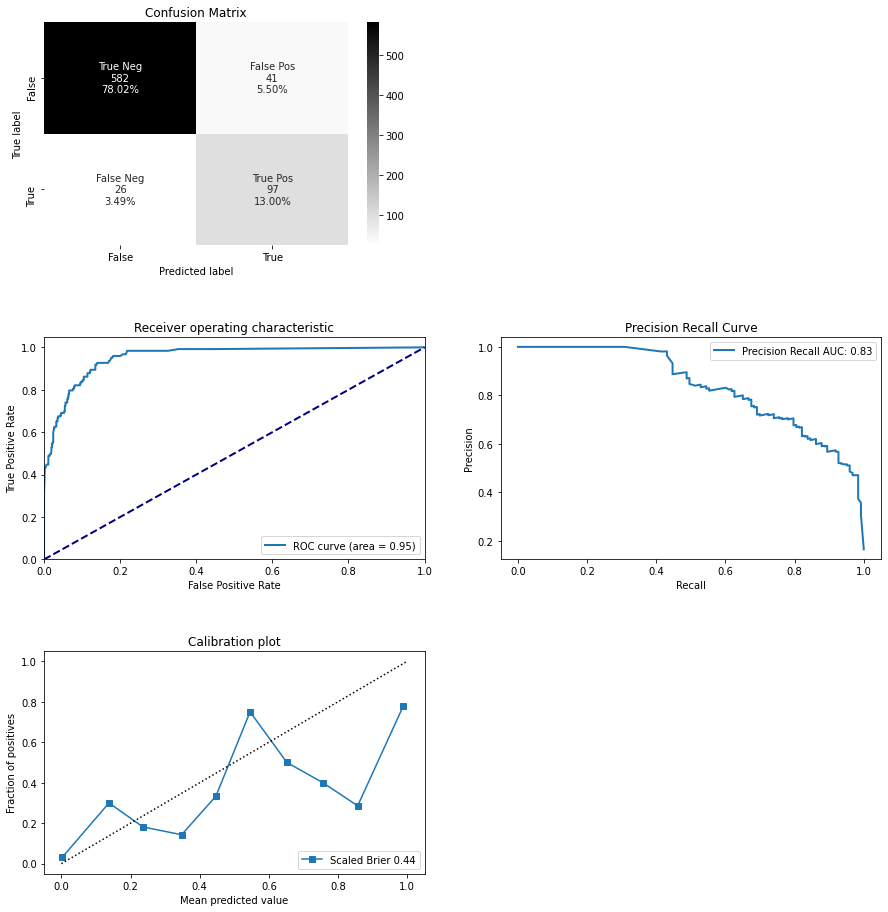

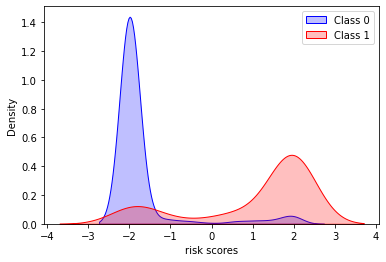

,,
,,
Ground Truth Prevalence,. . .,0.165
Test set Prevalence,. . .,0.185
True positive rate (recall),. . .,0.789
False positive rate,. . .,0.066
Positive predictive value (precision),. . .,0.703
True negative rate (specificity),. . .,0.934
False negative rate,. . .,0.211
Negative predictive value,. . .,0.957
Positive likelihood ratio (bigger is better),. . .,11.983


In [84]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results

In [85]:
evaluate_model(lgbmtuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

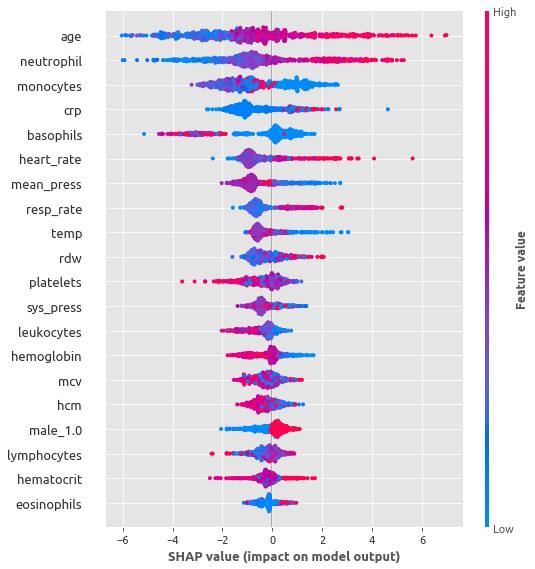

In [86]:
interpret_model(lgbmtuned)

In [87]:
plot_model(lgbmtuned, plot='ktops')

IntProgress(value=0, description='Processing: ', max=5)

Using 20% rows of the test set (n = 149)


,prob,predicted_class,real,result
618,1.000,1,1,1
646,1.000,1,1,1
715,1.000,1,1,1
33,1.000,1,1,1
111,1.000,1,1,1
...,...,...,...,...
350,0.332,1,0,0
541,0.328,1,1,1
710,0.326,1,0,0
504,0.325,1,0,0


Positive rows in the test set= 123
True positive predictions in the 20% k-tops =  100
% of accuracy = 81.30081300813008%


In [88]:
# cattuned

### 2.3.1) Build a model with all data

In [89]:
final_model = finalize_model(lgbmtuned)

In [90]:
str(final_model.__class__.__name__)

'LGBMClassifier'

In [92]:
final_model_name = str(final_model.__class__.__name__) + '_same_region_plus_70pct_one_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
# final_model_name

In [93]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [94]:
final_model

LGBMClassifier(class_weight='balanced', colsample_bytree=0.9500447593962819,
               n_estimators=1067, num_leaves=64, random_state=42,
               reg_alpha=0.021377284848035916, reg_lambda=0.8398830119506808,
               scale_pos_weight=11)

# Use the saved model to predict on specific hospital

In [96]:
import pickle
import joblib

#Carrego o modelo unico
# print('loaded: ' + final_model_name)
all_except_one_model_pkl = final_model_name + ".pkl"
prep_pipe_all_except_one, all_except_one_model = joblib.load(all_except_one_model_pkl)

In [97]:
all_except_one_model.__class__.__name__

'LGBMClassifier'

In [98]:
# x_test_specific_name

In [99]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(533, 25)

In [100]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [101]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["death"]
y_test_single.shape

(533,)

In [103]:
pd.set_option('display.max_columns', None)
# X_test_single.head()

In [104]:
X_test_single["class"] = y_test_single

In [105]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state', 'class'],
      dtype='object')

In [106]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [107]:
X_test_single_transformed = prep_pipe_all_except_one.fit_transform(X_test_single)
X_test_single_transformed.head()

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Categorical
resp_rate,Numeric
sys_press,Categorical
dias_press,Categorical
mean_press,Categorical
temp,Categorical
hemoglobin,Numeric
platelets,Numeric


,class,age,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,male_1.0
5959,1,0.459,1.258,0.451,1.251,0.874,0.711,-0.198,0.694,0.179,1.432,0.480,-0.093,-0.255,0.016,1.000
6979,0,0.266,0.581,1.359,0.763,1.481,-1.547,0.253,-1.355,-0.124,-0.003,0.571,5.643,1.448,-0.914,1.000
7146,0,0.072,0.064,-1.482,0.018,0.115,-0.477,0.366,-0.648,0.105,-1.533,-1.216,-0.689,-0.351,-1.191,0.000
6938,1,1.296,0.621,-0.133,0.574,0.377,0.354,-0.198,0.228,-0.093,0.359,0.021,-0.018,-0.255,0.486,0.000
6514,0,-1.281,1.855,1.193,1.724,1.730,0.394,-0.930,0.072,-0.118,0.219,0.461,-0.018,-0.255,0.009,1.000


In [108]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [109]:
X_test_single_transformed.shape

(533, 15)

In [110]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [111]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0'],
      dtype='object')

In [112]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['crp',
 'dias_press',
 'heart_rate',
 'mean_press',
 'resp_rate',
 'sys_press',
 'temp']

### Add missing columns to some hospitals that didn't collect all columns

In [113]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    elif(column=='male_1.0'):
        X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_0.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [114]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [115]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0', 'crp',
       'dias_press', 'heart_rate', 'mean_press', 'resp_rate', 'sys_press',
       'temp'],
      dtype='object')

In [116]:
X_test_single_transformed.shape

(533, 22)

In [117]:
X_test_single_transformed.shape

(533, 22)

In [118]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [119]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0', 'crp',
       'dias_press', 'heart_rate', 'mean_press', 'resp_rate', 'sys_press',
       'temp'],
      dtype='object')

**Reorder columns**

In [120]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [121]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(533, 22)

In [123]:
X_test_same_region_absolute_vs_one_name = 'X_test_same_region_absolute_vs_one_transformed_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
# X_test_same_region_absolute_vs_one_name

In [124]:
X_test_single_transformed.to_csv(X_test_same_region_absolute_vs_one_name, sep=';')

0.6508078083304328


[<matplotlib.lines.Line2D at 0x1c6128db748>]

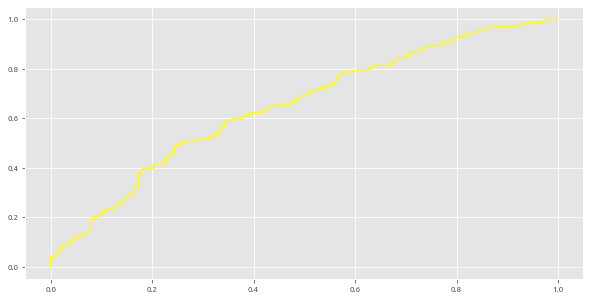

In [125]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = all_except_one_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - XGBoost - AUC " +  str(auc_ind), color="yellow")

In [126]:
y_pred_prob1.shape

(533,)

In [127]:
y_pred = all_except_one_model.predict(X_test_single_transformed)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [129]:
# import MLFlow_Utils
# binary_classification_metrics(y_test_single, y_pred, y_pred_prob1)

In [130]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.6508078083304328

In [131]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.60', '0.70']

In [132]:
#recall
tpr(y_test_single, y_pred)

0.0

In [133]:
#specificidade
tnr(y_test_single, pd.Series(y_pred))

1.0

In [134]:
#accuracy
accuracy(y_test_single, y_pred)

0.5853658536585366

In [137]:
# ppv(y_test_single, y_pred)

In [136]:
npv(y_test_single, y_pred)

0.5853658536585366

# End of File